In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.datasets import load_boston

In [2]:
# We will run our regression on the boston house price dataset
# Read this description
boston=load_boston()
print(boston.DESCR)
#Load Dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#load the dataset
X,y = load_boston(True)
print(type(X))
print(type(y))
print(X.shape,y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13) (506,)


In [4]:
y=y.reshape((506,1))
print(X[0])
print(y[0])
print(X.shape,y.shape)

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
[24.]
(506, 13) (506, 1)


In [5]:
#Add bias term in X
m,n = X.shape
print(m,n)
print(X[0])
#write your own
X=np.insert(X,0,values=np.ones(m),axis=1)
###
m,n=X.shape
print(m,n)
print(X[0])

506 13
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
506 14
[1.000e+00 6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00
 6.520e+01 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [6]:
#divide data into train,validate as 80%,20%
train_start = 0
train_end = int(.8*m)
validtaion_start = int(.8*m)
validation_end = int(1*m)
X_train = X[train_start:train_end,:]
y_train = y[train_start:train_end,:]
X_validate = X[validtaion_start:validation_end,:]
y_validate = y[validtaion_start:validation_end,:]

print( X.shape,y.shape)
print( X_train.shape,y_train.shape)
print( X_validate.shape,y_validate.shape)

assert X_train.shape[0]+X_validate.shape[0] == X.shape[0]
assert y_train.shape[0]+y_validate.shape[0] == y.shape[0]

(506, 14) (506, 1)
(404, 14) (404, 1)
(102, 14) (102, 1)


Text(0.5, 1.0, 'Prices vs Predicted prices')

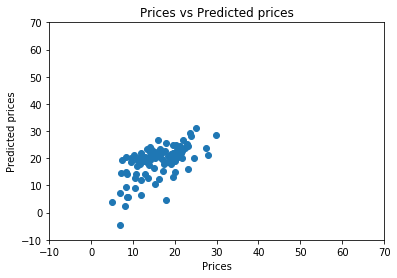

In [7]:
# a regression model from sklearn library
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train.reshape(y_train.shape[0],))

Y_pred = lm.predict(X_validate)

plt.scatter(y_validate, Y_pred)
plt.ylim(-10,70)
plt.xlim(-10,70)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [12]:

def gradientDescent(X,y,theta,m,alpha,numIter):
    i=0;cost_arr=[]
    itr_arr=[]
    n = X.shape[1]
    cost_arr = np.zeros(numIter)
    itr_arr =np.zeros(numIter)
    for i in range(numIter):
        itr_arr[i] = i
        H = np.dot(X,theta)
        Z = H - y
        cost = sum(Z ** 2) *(1/2*m)
        cost_arr[i] = cost
        gradient = (np.sum(np.multiply(H,X),axis = 0)* (1/m)).reshape(n,1)
        theta = theta - alpha * gradient
    plt.plot(itr_arr,cost_arr)
    plt.show()
    return theta;



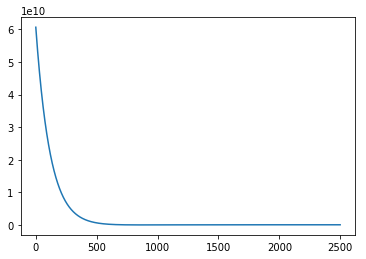

In [13]:

theta = np.ones((n,1))

alpha = 0.0000000147 #set alpha
numIter = 2500 #set numIter
#fit parameter vector theta
theta = gradientDescent(X_train,y_train,theta,X_train.shape[0],alpha,numIter)
#print(theta.shape)

In [10]:
def predict(X,y,theta):
    #write your own
    y_pred = np.dot(X,theta)
    return y_pred    

Text(0.5, 1.0, 'Prices vs Predicted prices')

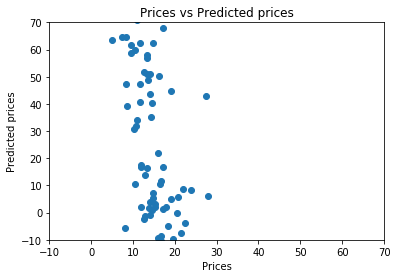

In [11]:
y_pred=predict(X_validate,y_validate,theta)
plt.scatter(y_validate, y_pred)
plt.ylim(-10,70)
plt.xlim(-10,70)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")